### Titanic ML survival prediction

We are given a dataset containing some passanger information, given certain passanger caracteristics we are asked to predict if said passanger survives the disaster or not.

Let's explore the train data set we are given.


1 = Survive

0 = Not survived

**Data Dictionary**

Variable	Definition	Key
survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex	
Age	Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton
Variable Notes

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [1]:
import pandas as pd
import numpy as np


In [21]:
data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We will not use the Cabin feature at the moment. First we shall check for any missing values on the features we will use

In [100]:
data.drop('Cabin',axis=1,inplace=True)

In [108]:
for i in data.columns:
    print i, ' :' , data[i].isnull().sum()

 PassengerId  : 0
Survived  : 0
Pclass  : 0
Name  : 0
Sex  : 0
Age  : 177
SibSp  : 0
Parch  : 0
Ticket  : 0
Fare  : 0
Embarked  : 2
Soc_Group  : 0


So there are 177 missing values in Age and 2 missing values in the embarcation port. We are going to substitute the Age missing values for the mean value, the embarked ones by the mode

In [127]:
data.Age.describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [125]:
print 'Mean age female: ' , data[data.Sex == 'female'].Age.mean()
print 'Mean age male: ', data[data.Sex == 'male'].Age.mean()

Mean age female:  28.2167300487
Mean age male:  30.505824243


We consider that filling NA with mean age is good enough.

In [118]:
data.Age.fillna(value=data.Age.mean(), inplace=True)

In [120]:
data.Embarked.mode()

0    S
dtype: object

In [121]:
data.Embarked.fillna(value = 'S', inplace=True)

In [22]:
data['Soc_Group'] = 0

In [34]:
data.loc[data.Sex == 'female', 'Soc_Group'] = 2
data.loc[data.Sex == 'male', 'Soc_Group'] = 3
data.loc[data.Age < 13, 'Soc_Group'] = 1 #Child is genderless

In [46]:
h=data[data.Soc_Group == 3][data.Pclass == 1]
surv_rate = h.Survived.sum()/float(h.Survived.size)
print surv_rate

0.352941176471


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


In [74]:
## Survival rate per pcclass / gender + kid < 12
Pclass = data.Pclass.unique()
Soc_Group = data.Soc_Group.unique()
surv_rate = np.zeros((Pclass.size, Soc_Group.size), dtype=float)
for i in Pclass:
    for j in Soc_Group:
        h=data[data.Soc_Group == j][data.Pclass == i]   
        surv_rate[i-1][j-1] = h.Survived.sum()/float(h.Survived.size)

surv_rate = pd.DataFrame(surv_rate,dtype=float, columns=['Child','Female', 'Male'], index =['1rst','2nd','3rd'])
surv_rate

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


,Child,Female,Male
1rst,0.750000,0.978495,0.352941
2nd,1.000000,0.911765,0.080808
3rd,0.416667,0.504132,0.118012


In [ ]:
import matplotlib as plt
import seaborn as sns
%matplotlib inline

In [87]:
surv_rate.index.name ='P Class'
surv_rate.columns.name ='Group'

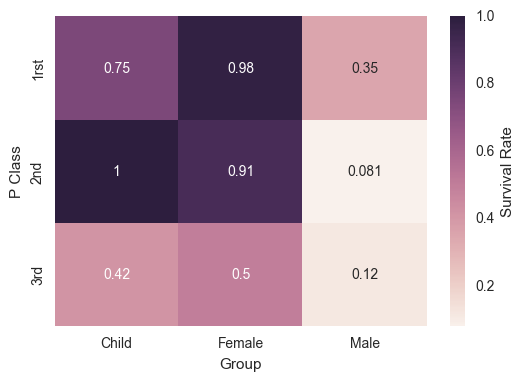

In [88]:

sns.heatmap(surv_rate, annot=True, cbar_kws= {'label': 'Survival Rate'})


As expected, survival rate is higher on females and childs, and also much higher on first class than on the second.

In [89]:
data[data.Soc_Group == 1][data.Pclass == 2].Age.describe()

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


count    17.000000
mean      3.490000
std       2.521966
min       0.670000
25%       1.000000
50%       3.000000
75%       5.000000
max       8.000000
Name: Age, dtype: float64

In [90]:
data[data.Soc_Group == 1][data.Pclass == 1].Age.describe()

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


count     4.000000
mean      4.480000
std       4.530077
min       0.920000
25%       1.730000
50%       3.000000
75%       5.750000
max      11.000000
Name: Age, dtype: float64

There is only 4 kids that travelled on first class, 17 on second class, numbers are so low it doesnt make sense to reach statistical conclussions. That explains the lower survival rate of the high class

### LET'S START WITH A NAIVE PREDICTOR:


In [189]:
def naive_prediction(X):
    """
    Naive prediction using previously discussed data. Based only on soc_group and Pclass
    X: data values containing only soc_group and Pclass
    """
    sample_size = X.shape[0]
    prediction = np.zeros(sample_size)
    
    for i in range(sample_size):
        if X[i][1] == 2 or ((X[i][0] in [1,2]) and X[i][1] != 3):
            prediction[i] = 1
    
    return prediction

In [ ]:
X_naive = data[['Pclass', 'Soc_Group']].values
pred_naive = naive_prediction(X_naive) 

In [250]:
ifzero = data.Survived - pred_naive #if prediction is correct value will be 0
score_naive = ifzero[ifzero == 0].count()/float(ifzero.size) #we count number of corrrect predictions and calculate %
print 'Naive score: ', score_naive

Naive score:  0.801346801347


### LOGISTIC REGRESSION

Problem looks fit for a logistic regression, let's see if we can improve the score

In [92]:
from sklearn.linear_model import LogisticRegression

In [229]:
#Fit a logistic regression
features = list(data.columns[2:])
features


['Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Embarked',
 'Soc_Group']

In [230]:
features.remove('Name')
features.remove('Soc_Group')
features.remove('Ticket')

In [231]:
features

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

In [233]:
LR = data[features].copy()
LR['Emb'] = 0
LR.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [234]:
LR.loc[LR.Embarked == 'S', 'Emb']=1
LR.loc[LR.Embarked == 'C', 'Emb']=2
LR.loc[LR.Embarked == 'Q', 'Emb']=3

In [235]:
LR.loc[LR.Sex == 'female', 'Sex']=1
LR.loc[LR.Sex == 'male', 'Sex']=2

In [236]:
LR.drop('Embarked', axis=1, inplace=True)

In [237]:
LR.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Emb
0,3,2,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,2
2,3,1,26.0,0,0,7.9250,1
3,1,1,35.0,1,0,53.1000,1
4,3,2,35.0,0,0,8.0500,1


In [287]:
used_features=['Pclass', 'Sex', 'Age','SibSp', 'Parch', 'Emb', 'Fare']
X_lr = LR[used_features].values
y = data.Survived.values

print X_lr.shape, y.shape

(891, 7) (891,)


In [288]:
#fit logistic regression
model = LogisticRegression(C=1)
model.fit(X_lr, y)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [289]:
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split

scores_lr = cross_val_score(model,X_lr,y, cv=5)

print 'Score LR: ' , scores_lr.mean()
print 'Score Naive: ', score_naive

scores_lr

Score LR:  0.800236329907
Score Naive:  0.801346801347


array([ 0.80446927,  0.81005587,  0.78651685,  0.7752809 ,  0.82485876])

We have reached a precission of 0.80, we did not improve the score!